In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure
from datetime import datetime
import numpy as np
import os 

path = os.path.abspath("C:/Users/steve/Google Drive/Master/Masterarbet/Evaluation/graphics/disruption")
print(path)


font = {'size': 13}
plt.rc('font', **font)


# Read in the data from the CSV file
telnetToLocalVM2Both = pd.read_csv('telnetToServerVM2MTDBoth.txt')
telnetToLocalVM2Both = telnetToLocalVM2Both.iloc[-3000:]
print(telnetToLocalVM2Both)


telnetToLocalVM2OnlyIP = pd.read_csv('telnetToServerVM2MTDOnlyIP.txt')
telnetToLocalVM2OnlyIP = telnetToLocalVM2OnlyIP.iloc[-3000:]
telnetToLocalVM2BothActive = pd.read_csv('telnetToServerVM2MTDBothActive.txt')
telnetToLocalVM2BothActive = telnetToLocalVM2BothActive.iloc[-3000:]


print(telnetToLocalVM2Both)
print(telnetToLocalVM2OnlyIP)
print(telnetToLocalVM2BothActive)

C:\Users\steve\Google Drive\Master\Masterarbet\Evaluation\graphics\disruption
          time  telnetToServerPossible
4557  17:35:00                    True
4558  17:35:01                    True
4559  17:35:01                    True
4560  17:35:02                    True
4561  17:35:02                    True
...        ...                     ...
7552  18:00:41                    True
7553  18:00:42                    True
7554  18:00:42                    True
7555  18:00:43                    True
7556  18:00:44                    True

[3000 rows x 2 columns]
          time  telnetToServerPossible
4557  17:35:00                    True
4558  17:35:01                    True
4559  17:35:01                    True
4560  17:35:02                    True
4561  17:35:02                    True
...        ...                     ...
7552  18:00:41                    True
7553  18:00:42                    True
7554  18:00:42                    True
7555  18:00:43                    True


In [16]:
for index, row in telnetToLocalVM2Both.iterrows():
    if row["telnetToServerPossible"] == False:
        print(f"there is at least one unable in VM2OBoth")
        break
        
for index, row in telnetToLocalVM2OnlyIP.iterrows():
    if row["telnetToServerPossible"] == False:
        print(f"there is at least one unable in VM2OnlyIP")
        break
        
for index, row in telnetToLocalVM2BothActive.iterrows():
    if row["telnetToServerPossible"] == False:
        print(f"there is at least one unable in VM2OnlyIP")
        break
        
        

there is at least one unable in VM2OnlyIP


ValueError: 'label' must be of length 'x'

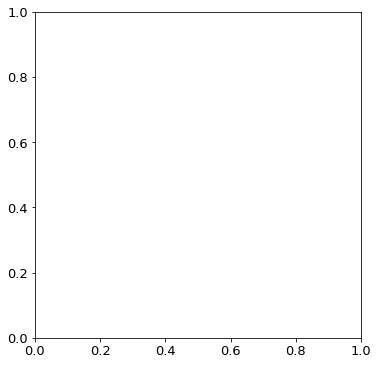

In [14]:
labelsBoth = "Possible outgoing Connection", "Impossible outgoing Connection"
colors = ["#1f77b4", "#d62728"]
width = 0.35
fig1, ax1 = plt.subplots(figsize=(10,6))
fig1.patch.set_facecolor('white')
telnetCountsPossible = telnetToLocalVM2Both['telnetToServerPossible'].value_counts()

#coopAndReactiveShare =  telnetCountsPossible[0]/ (telnetCountsPossible[0] + telnetCountsPossible[1])
#print(coopAndReactiveShare)
ax1.pie(telnetCountsPossible, labels=labelsBoth, autopct='%1.1f%%', startangle=175,colors = colors,textprops=dict(color="black"),labeldistance=None)
ax1.legend(labelsBoth,title='')
ax1.axis('equal')
ax1.set_title("Average Share of Impossible Connections to VM2's\n Telnet Service with Cooperative and Reactive MTD")

filename = "telnetToLocalCoopAndReactive.png"
plt.savefig(os.path.join(path,filename),dpi= 800)


plt.show()

print(telnetCountsPossible)






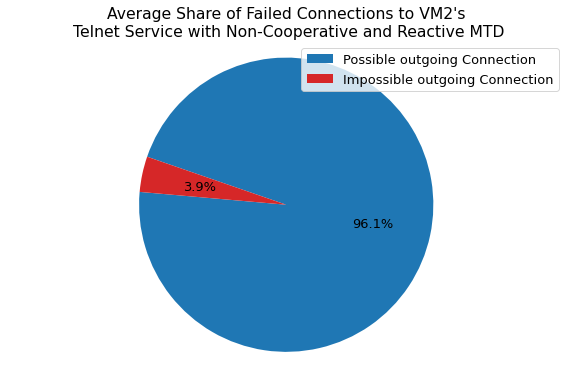

0.039
True     2883
False     117
Name: telnetToServerPossible, dtype: int64


In [11]:




labelsBoth = "Possible outgoing Connection", "Impossible outgoing Connection"
colors = ["#1f77b4", "#d62728"]
width = 0.35
fig1, ax1 = plt.subplots(figsize=(10,6))
fig1.patch.set_facecolor('white')
telnetCountsPossible = telnetToLocalVM2OnlyIP['telnetToServerPossible'].value_counts()
noncoopAndReactiveShare =  telnetCountsPossible[0]/ (telnetCountsPossible[0] + telnetCountsPossible[1])
ax1.pie(telnetCountsPossible, labels=labelsBoth, autopct='%1.1f%%', startangle=175,colors = colors,textprops=dict(color="black"),labeldistance=None)
ax1.legend(labelsBoth,title='')
ax1.axis('equal')
ax1.set_title("Average Share of Failed Connections to VM2's\n Telnet Service with Non-Cooperative and Reactive MTD")

filename = "telnetToLocalNoncoopAndReactive.png"
plt.savefig(os.path.join(path,filename),dpi= 800)


plt.show()


print(noncoopAndReactiveShare)
print(telnetCountsPossible)


KeyError: 0

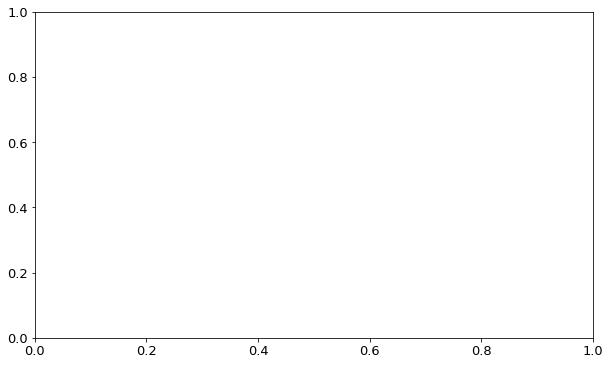

In [12]:

labelsBoth = "Possible outgoing Connection", "Impossible outgoing Connection"
colors = ["#1f77b4", "#d62728"]
width = 0.35
fig1, ax1 = plt.subplots(figsize=(10,6))
fig1.patch.set_facecolor('white')
telnetCountsPossible = telnetToLocalVM2BothActive['telnetToServerPossible'].value_counts()
coopAndPractiveShare =  telnetCountsPossible[0]/ (telnetCountsPossible[0] + telnetCountsPossible[1])
if telnetCountsPossible[0] > telnetCountsPossible[1]:
    telnetCountsPossible = telnetToLocalVM2BothActive['telnetToLocalPossible'].value_counts(ascending=True)
ax1.pie(telnetCountsPossible, labels=labelsBoth, autopct='%1.1f%%', startangle=175,colors = colors,textprops=dict(color="black"),labeldistance=None)
ax1.legend(labelsBoth,title='')
ax1.axis('equal')
ax1.set_title("Average Share of Impossible Connections to VM2's\n Telnet Service with Cooperative and Proactive MTD")

filename = "telnetToLocalCoopAndProactive.png"
plt.savefig(os.path.join(path,filename),dpi= 800)
plt.show()

print(telnetCountsPossible)
print(coopAndPractiveShare)







NameError: name 'coopAndReactiveShare' is not defined

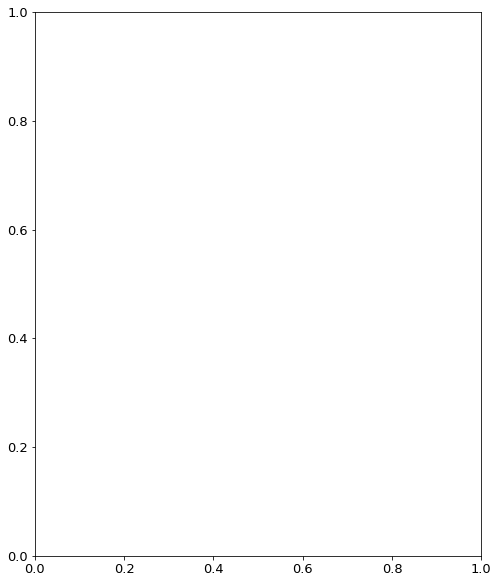

In [15]:
width = 0.35   

fig, ax = plt.subplots(figsize=(8,10))


ax.bar(['Non-Cooperative \n (reactive)', 'Cooperative \n (reactive)','Cooperative \n (proactive)'], [noncoopAndReactiveShare*100, coopAndReactiveShare*100,coopAndPractiveShare*100])
plt.title('Average Share of Failed Incoming Telnet Connections')
plt.xlabel('MTD Type')
plt.ylabel('Share of Failed Incoming Telnet Connection in %')

plt.tight_layout()
filename = "telnetToLocalSummary.png"
plt.savefig(os.path.join(path,filename),dpi= 800)

plt.show()